# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs
- a deep learning research platform that provides maximum flexibility and speed

---

## A replacement for NumPy to use the power of GPUs...

In [1]:
import torch as t

# Tensors
a = t.tensor([1,2,3])
# Can specify type during construction
a = t.tensor([1,2,3], dtype=t.half)

In [2]:
# Can cast to different types once constructed
a

tensor([1., 2., 3.], dtype=torch.float16)

In [3]:
a.double()

tensor([1., 2., 3.], dtype=torch.float64)

In [4]:
a.float()

tensor([1., 2., 3.])

In [5]:
a.short()

tensor([1, 2, 3], dtype=torch.int16)

In [6]:
a.long()

tensor([1, 2, 3])

| Data type                | dtype	                       |CPU tensor	        |GPU tensor               |
|:------------------------:|:-----------------------------:|:------------------:|:-----------------------:|
| 32-bit floating point    | torch.float32 or torch.float  | torch.FloatTensor  | torch.cuda.FloatTensor  |
| 64-bit floating point    | torch.float64 or torch.double | torch.DoubleTensor | torch.cuda.DoubleTensor |
| 16-bit floating point	   | torch.float16 or torch.half   | torch.HalfTensor   | torch.cuda.HalfTensor   |
| 8-bit integer (unsigned) | torch.uint8                   | torch.ByteTensor   | torch.cuda.ByteTensor   |
| 8-bit integer (signed)   | torch.int8	                   | torch.CharTensor   | torch.cuda.CharTensor   |
| 16-bit integer (signed)  | torch.int16 or torch.short	   | torch.ShortTensor  | torch.cuda.ShortTensor  |
| 32-bit integer (signed)  | torch.int32 or torch.int	   | torch.IntTensor    | torch.cuda.IntTensor    |
| 64-bit integer (signed)  | torch.int64 or torch.long	   | torch.LongTensor   | torch.cuda.LongTensor   |


### Converting between Tensors and Numpy Arrays...
Tensor -> Numpy

In [2]:
import numpy as np

x = t.Tensor([1,2,3.])
x.type()

'torch.FloatTensor'

In [8]:
y = x.numpy()
type(y)

numpy.ndarray

However, they point to the same place in memory...

In [9]:
x

tensor([1., 2., 3.])

In [10]:
y

array([1., 2., 3.], dtype=float32)

In [11]:
x += 10
x

tensor([11., 12., 13.])

In [12]:
y

array([11., 12., 13.], dtype=float32)

Numpy -> Tensor

In [13]:
y = np.array([5,4,3])
type(y)

numpy.ndarray

In [14]:
x = t.from_numpy(y)
type(x)

torch.Tensor

In [15]:
y

array([5, 4, 3])

In [16]:
x

tensor([5, 4, 3])

In [17]:
y += 10
y

array([15, 14, 13])

In [18]:
x

tensor([15, 14, 13])

### Speed and Efficiency
Sometimes, PyTorch is faster than Numpy. Sometimes, Numpy is faster than PyTorch

In [4]:
import time
def timer(f, trials=5):
    avg_time = 0
    for i in range(trials):
        start = time.time()
        f()
        stop = time.time()
        avg_time += (stop - start)/trials
    return avg_time

In [5]:
np_arr = np.random.rand(10000,10000)
t_arr = t.rand((10000,10000))

In [21]:
print('type(t_arr) = ', type(t_arr))
print('t_arr.shape = ', t_arr.shape)

type(t_arr) =  <class 'torch.Tensor'>
t_arr.shape =  torch.Size([10000, 10000])


In [22]:
print('type(np_arr) = ', type(np_arr))
print('np_arr.shape = ', np_arr.shape)

type(np_arr) =  <class 'numpy.ndarray'>
np_arr.shape =  (10000, 10000)


In [27]:
timer(lambda: t_arr*t_arr)

0.06684823036193847

In [38]:
timer(lambda: np_arr*np_arr)

0.10766859054565431

What about optimizing with some class methods?

In [29]:
def exp1():
    y = t_arr * t_arr

In [30]:
y = t.empty(t_arr.shape)
def exp2():
    t.mul(t_arr, t_arr, out=y)

In [31]:
def exp3():
    t_arr.mul_(t_arr)

In [35]:
timer(exp1)

0.06495528221130371

In [36]:
timer(exp2)

0.04526433944702148

In [37]:
timer(exp3)

0.02980661392211914

In [55]:
timer(lambda: np.matmul(np_arr,np_arr))

7.486955070495605

In [56]:
timer(lambda: t.matmul(t_arr,t_arr))

16.323712825775146

In [57]:
timer(lambda: t_arr@t_arr)

16.27776246070862

### Tensors have 100+ built-in class methods 
including all your favorite numpy convenience methods and a a growing linear algebra library

## What about the GPU?
There is a class method call 'to()', that sends a tensor to a specific device. This is new in 0.4.0.

In [6]:
t.cuda.list_gpu_processes()

'GPU:0\nprocess    1153465 uses     1225.000 MB GPU memory'

In [58]:
t_arr.shape

torch.Size([10000, 10000])

In [59]:
t_arr.device # Should currently be on the cpu

device(type='cpu')

In [7]:
device = t.device('cuda:0')
t_arr_gpu = t_arr.to(device)

In [67]:
t_arr.device

device(type='cpu')

In [8]:
t_arr_gpu.device

device(type='cuda', index=0)

In [9]:
timer(lambda: t_arr*t_arr)

0.056171989440917974

In [10]:
timer(lambda: t_arr_gpu*t_arr_gpu)

RuntimeError: CUDA out of memory. Tried to allocate 382.00 MiB (GPU 0; 3.81 GiB total capacity; 382.00 MiB already allocated; 347.38 MiB free; 382.00 MiB reserved in total by PyTorch)

In [11]:
timer(lambda: np_arr*np_arr)

0.10780024528503418

In [67]:
0.47127203941345214/0.00011396408081054688

4135.26820083682

## a deep learning research platform that provides maximum flexibility and speed

Central to all neural networks in PyTorch is the autograd package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all built-in operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

In [12]:
b = t.tensor([2], dtype=t.float32)

In [13]:
b.requires_grad

False

In [14]:
y=b*b*b
y.requires_grad

False

In [15]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [16]:
b.requires_grad = True # or b.requires_grad_()

In [17]:
y=b*b*b
y.requires_grad

True

In [18]:
z = y*y

In [19]:
z.backward()

In [20]:
y.grad_fn

In [21]:
b.grad

tensor([192.])

In [22]:
z.grad

<ipython-input-22-1ee473f924b8>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  z.grad


In [23]:
c = b.detach()

In [24]:
y=c*c

In [25]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [3]:
import matplotlib
import matplotlib.pyplot as plt

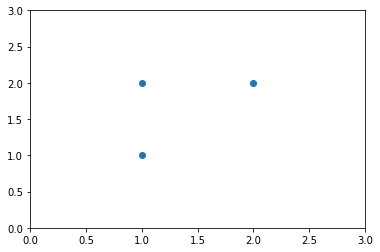

In [4]:
pts = t.tensor([(1,1),(1,2),(2,2)]).float()
plt.scatter(pts[:,0],pts[:,1]); plt.xlim(0,3); plt.ylim(0,3); plt.show()

In [5]:
params = t.tensor((1,0), requires_grad=True, dtype=t.float32)

In [6]:
diff = params[0]*pts[:,0]+params[1]-pts[:,1]
sq = (diff*diff).float()
loss = sq.mean()
loss.backward()
print(params.requires_grad)
params = params - 0.001*params.grad

True
